<a href="https://colab.research.google.com/github/kush450629/ME421_GROUP_A1/blob/main/Vibration/ME421_E20070_Vibrations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

E/20/070 - DILSHAN H.A.L.L.

Activity 1 - Derivation oF 2-DOF Model that will Capture the First Two Dominant Modes of Small Amplitude Vibration of the System

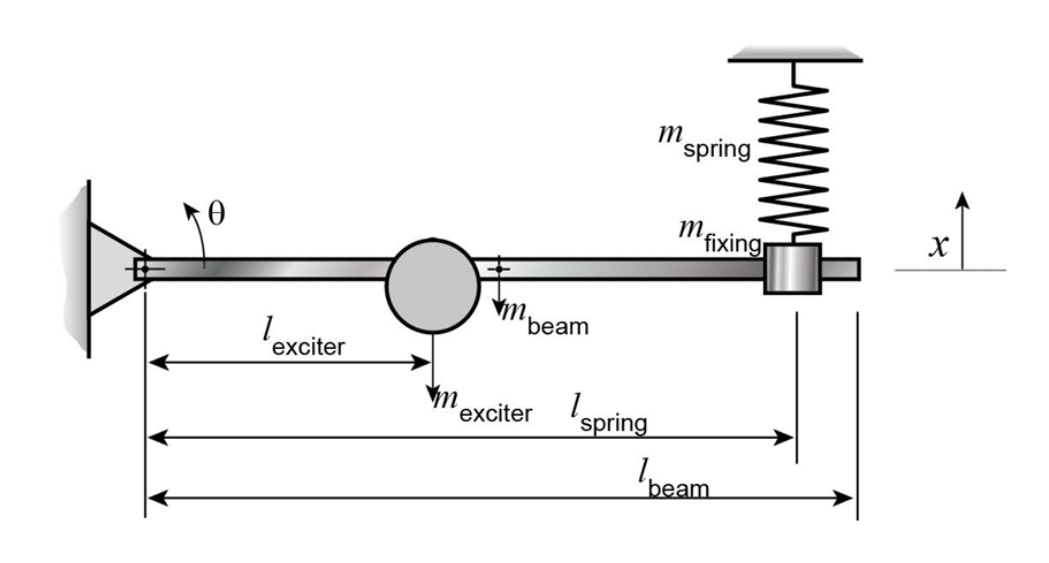